# ĐỒ ÁN CUỐI KỲ - TRỰC QUAN HOÁ DỮ LIỆU

### Thành viên:
- Huỳnh Lê Minh Nhật - 1712632

- Lê Thanh Hiếu - 1712434

# 1. Đặt vấn đề

* IIP (Index of industrial production) là tỷ lệ phần trăm giữa khối lượng sản xuất công nghiệp tạo ra trong kỳ hiện tại với khối lượng sản xuất công nghiệp kỳ gốc. Đây là một chỉ số quan trọng được sử dụng để phản ánh, mô tả sự phát triển của các ngành công nghiệp và phần nào đó phản ánh được những diễn biến trong nền kinh tế của Việt Nam.
* Qua thông tin báo đài, có vẻ như nền kinh tế Việt Nam đang có những dấu hiệu tích cực trong những năm gần đây (vốn đầu tư nước ngoài tăng mạnh, sự dịch chuyển các nhà máy từ Trung Quốc đến Việt Nam, một số thương hiệu Việt được ra mắt,...). Ngoài ra, trong giai đoạn từ cuối năm 2019 và 7 tháng đầu năm 2020, cả Việt Nam và thế giới đều phải hứng chịu những tổn thất rất lớn về kinh tế do đại dịch Covid-19.
* Với những lý do trên và số liệu về IIP của Cục thống kê, nhóm nhận thấy đây là một chủ đề rất thú vị để sử dụng trực quan hoá dữ liệu nhằm phân tích những nội dung sau:
  * Liệu công nghiệp Việt Nam giai đoạn 2017-2020 có phát triển đúng hướng ?
  * Đại dịch Covid-19 ảnh hưởng đến các ngành công nghiệp Việt Nam như thế nào ?

 

# 2. Tổng quan

## 2.1. Dữ liệu

Dữ liệu được chọn là độ tăng trưởng chỉ số sản xuất công nghiệp của Việt Nam qua từng tháng, được thu thập từ Tổng cục thống kê.

Chỉ số sản xuất công nghiệp (Index of Industrial Production - IIP): là tỉ lệ phần trăm giữa khối lượng sản xuất công nghiệp tạo ra trong kì hiện tại với khối lượng sản xuất công nghiệp kì gốc.

Dữ liệu gồm có 43 dòng (mỗi dòng ứng với 1 tháng) và 6 thuộc tính:
- month: tháng, được thu thập từ tháng 01/2017 đến tháng 7/2020
- iip: Chỉ số sản xuất công nghiệp toàn ngành (%)
- mining: Khai khoáng (%)
- manufacturing: Công nghiệp chế biến, chế tạo (%)
- energy: Sản xuất và phân phối điện, khí đốt, nước nóng, hơi nước và điều hòa không khí (%)
- water: Cung cấp nước, hoạt động quản lý và xử lý rác thải, nước thải (%)

Các thuộc tính iip, mining, manufacturing, energy, water được lấy gốc so sánh ở năm 2015

**Nguồn:** Tổng cục thống kê Việt Nam

**Link:** http://nsdp.gso.gov.vn/

## 2.2. Thống kê

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('industry.csv')
df=df.set_index(df['month'])
df=df.drop(columns='month')
df.index=pd.to_datetime(df.index)
df.head(10)

,iip,mining,manufacturing,energy,water
month,,,,,
2017-01-01,96.80,85.71,97.47,110.62,98.09
2017-02-01,96.26,85.70,96.88,108.89,100.94
2017-03-01,114.49,104.71,116.50,117.50,100.63
2017-04-01,118.14,97.07,122.18,123.80,106.04
2017-05-01,117.49,99.15,120.08,130.85,102.65
2017-06-01,112.95,96.47,114.03,133.93,107.97
2017-07-01,113.89,86.57,116.56,140.84,107.76
2017-08-01,122.31,80.45,128.49,148.40,110.44
2017-09-01,126.63,82.94,133.99,146.67,107.09


In [ ]:
df_=df.subtract(100)
df_.head(5)

,iip,mining,manufacturing,energy,water
month,,,,,
2017-01-01,-3.20,-14.29,-2.53,10.62,-1.91
2017-02-01,-3.74,-14.30,-3.12,8.89,0.94
2017-03-01,14.49,4.71,16.50,17.50,0.63
2017-04-01,18.14,-2.93,22.18,23.80,6.04
2017-05-01,17.49,-0.85,20.08,30.85,2.65


In [ ]:
df.describe()

,iip,mining,manufacturing,energy,water
count,43.000000,43.000000,43.000000,43.000000,43.000000
mean,129.425349,90.510233,135.336047,151.209767,117.634419
std,13.783431,6.751565,16.511300,20.266849,11.681073
min,96.260000,78.580000,96.880000,108.890000,98.090000
25%,122.810000,85.630000,128.895000,134.850000,107.865000
50%,129.620000,90.060000,135.620000,155.030000,114.810000
75%,139.050000,95.575000,144.940000,164.930000,124.270000
max,152.900000,104.710000,164.660000,195.530000,144.260000


# 3. Trực quan dữ liệu

## 3.1. Trực quan dữ liệu sử dụng biểu đồ đường (line chart)

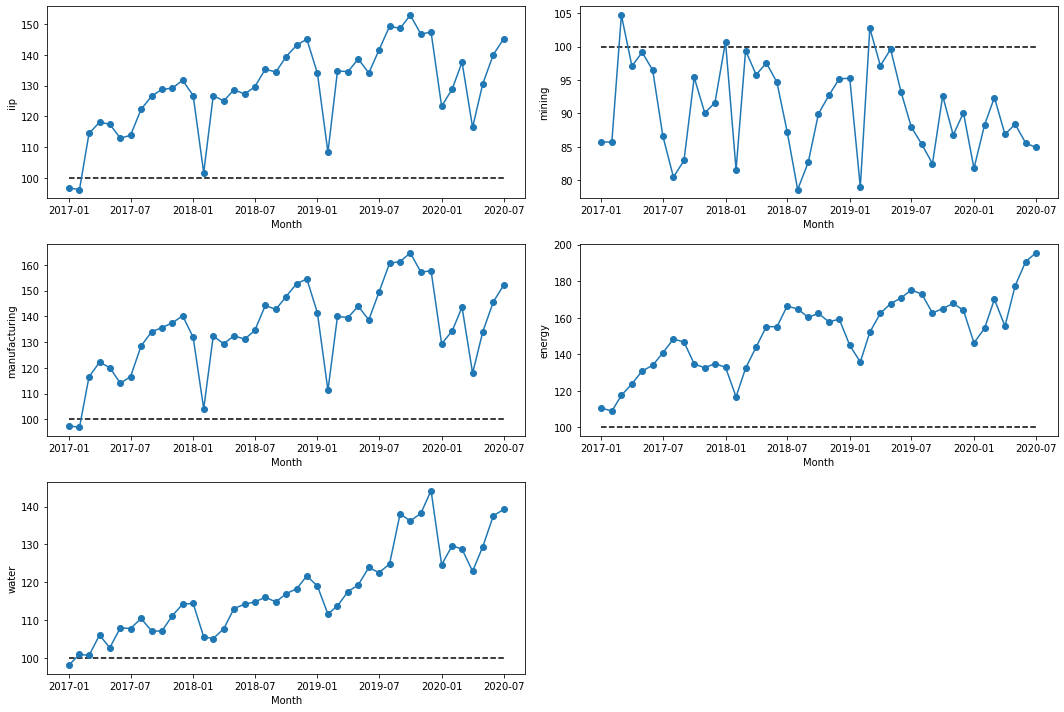

In [ ]:
fig, axs = plt.subplots(3,2,figsize=(15,10))
for i in range(df.shape[1]):
  r = i//2
  c = i%2
  axs[r,c].plot(df[df.columns[i]],marker='o')
  axs[r,c].hlines(100,df.index[0],df.index[-1],linestyles='dashed')
  axs[r,c].set_xlabel('Month')
  axs[r,c].set_ylabel(df.columns[i])

fig.tight_layout()
fig.delaxes(axs[2,1])
plt.show()

### 3.1.1. Chỉ số sản xuất công nghiệp - IIP
* Giai đoạn từ T1/2017 - T12/2019, chỉ số IIP chung của cả nước đã có những chuyển biến tích cực. Cụ thể ở mỗi tháng của những năm sau luôn có tỉ lệ tăng trưởng IIP so với năm trước đạt mức cao và so với kỳ gốc 2015.
* Giai đoạn 7 tháng đầu năm 2020, do tình dịch Covid-19 diễn biến phức tạp trên toàn cầu làm chuỗi cung ứng nguyên liệu đầu vào bị gián đoạn, đồng thời bùng phát ở một số địa phương trên cả nước dẫn đến lệnh giãn cách xã hội đã làm suy giảm rõ rệt chỉ số IIP so với cùng kỳ năm trước.

### 3.1.2. Chỉ số IIP của ngành công nghiệp Sản xuất và phân phối điện, khí đốt, nước nóng, hơi nước và điều hòa không khí
* Giai đoạn từ T1/2017 - T12/2019, các ngành trên đều có mức tăng trưởng của mỗi tháng của những năm sau ở mức cao so với năm trước và so với kỳ gốc 2015.
* Giai đoạn 7 tháng đầu năm 2020, mặc dù tình hình dịch Covid-19 nhưng các ngành __Sản xuất và phân phối điện, khí đốt, nước nóng, hơi nước và điều hòa không khí__ vẫn đạt mức tăng trưởng cao so với cùng kỳ 2019 (trừ tháng 4 do dãn cách xã hội nên tăng trưởng âm). 

### 3.1.3. Chỉ số IIP của ngành Công nghiệp chế biến, chế tạo
* Tình hình các ngành __Công nghiệp chế biến, chế tạo__ khá tương tương đồng với chỉ số IIP nhưng có mức tăng trưởng cao hơn.
    * Giai đoạn từ T1/2017 - T12/2019, ở mỗi tháng của những năm sau luôn có tỉ lệ tăng trưởng so với năm trước và so với kỳ gốc 2015 đạt mức cao.
    * Giai đoạn 7 tháng đầu năm 2020, do tình dịch Covid-19 diễn biến phức tạp đã làm suy giảm rõ rệt mức tăng trưởng so với cùng kỳ năm trước, thậm chí tăng trưởng âm ở một số tháng so với cùng kỳ năm trước. Nhưng bắt đầu có dấu hiệu hồi phục.

### 3.1.4. Chỉ số IIP của ngành công nghiệp Khai khoáng
* Tình hình các ngành __Khai khoáng__ có xu hướng giảm dần tỉ lệ tăng trưởng.
    * Giai đoạn từ T1/2017 - T12/2019, hầu như mỗi tháng của những năm sau luôn có tỉ lệ tăng trưởng thấp hơn so với cùng kỳ năm trước và so với kỳ gốc 2015.
    * Giai đoạn 7 tháng đầu năm 2020, tăng trưởng giảm sâu so với cùng kỳ.  

### 3.1.5. Chỉ số IIP của ngành công nghiệp Cung cấp nước, hoạt động quản lý và xử lý rác thải, nước thải
* Tình hình các ngành __Cung cấp nước, hoạt động quản lý và xử lý rác thải, nước thải__ khá tương tương đồng với chỉ số IIP chung.
    * Giai đoạn từ T1/2017 - T12/2019, hầu hết mỗi tháng của những năm sau luôn có tỉ lệ tăng trưởng so với năm trước và so với kỳ gốc 2015 đạt mức cao.
    * Giai đoạn 7 tháng đầu năm 2020, do tình dịch Covid-19 diễn biến phức tạp đã làm suy giảm rõ rệt mức tăng trưởng so với cùng kỳ năm trước, thậm chí tăng trưởng âm ở một số tháng so với cùng kỳ năm trước. Nhưng bắt đầu có dấu hiệu hồi phục.

### 3.2. Trực quan hoá chỉ số IIP chung và theo từng ngành công nghiệp bằng biểu đồ đường (multiple lines chart)

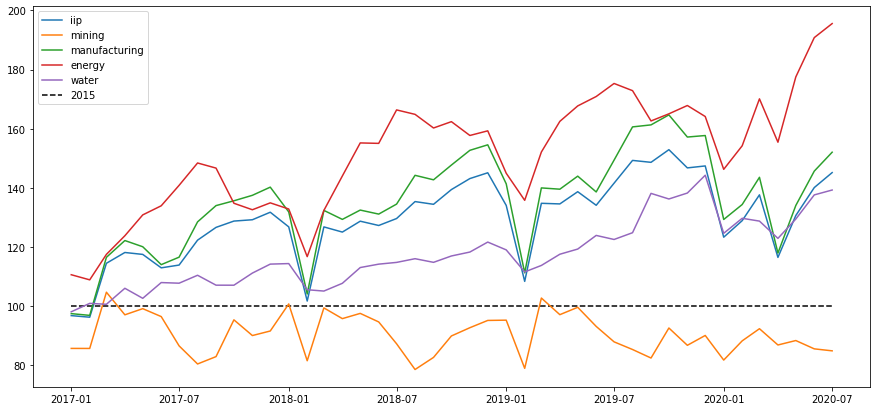

In [ ]:
fig, ax=plt.subplots(figsize=(15,7))
ax.plot(df)
ax.hlines(100,df.index[0],df.index[-1],linestyles='dashed')
ax.legend(list(df.columns)+['2015'])
plt.show()

* Từ biểu đồ trên, ta có thể rút ra được một số kết luận sau:
    * Biểu đồ đường của các ngành công nghiệp có khuynh hướng giống nhau qua từng tháng trong năm. Ví dụ như giai đoạn tháng 1 - 2, tất cả các ngành công nghiệp đều có chỉ số IIP thấp nhất năm. Điều này có thể được giải thích một cách đơn giản bởi vì người lao động được nghỉ Tết vào giai đoạn này nên tình hình sản xuất công nghiệp sẽ giảm.
    * Chỉ số IIP của ngành công nghiệp khai thác và ngành công nghiệp chế biến, chế tạo có những diễn biến tích cực trong những năm gần đây. Trong đó, sự giảm dần vai trò của những ngành khai thác trong nền kinh tế để hướng đến phát triển kinh tế bền vững hơn trong tương lai là hướng đi tích cực và đúng đắn của nền kinh tế Việt Nam trong những năm gần đây. Bên cạnh đó, sự gia tăng mạnh mẽ của ngành công nghiệp chế biến, chế tạo cũng tạo ra nhiều ưu điểm tích cực hơn đối với nền kinh tế.
    * Dịch Covid-19 đã gây ra tác hại rất lớn đối với nền công nghiệp của Việt Nam, bằng chứng là nó đã làm cho chỉ số IIP của hầu hết các ngành công nghiệp (trừ Sản xuất và phân phối điện, khí đốt, nước nóng, hơi nước và điều hòa không khí) đang ở mức cao hoặc tích cực cho phát triển kinh tế (với ngành công nghiệp khai khoáng thì tăng trưởng âm dần đều là thuận lợi) trở thành tăng trưởng âm ở một số giai đoạn hoặc tăng trưởng rất thấp so với cùng kỳ năm trước. Mặc dù đã có dấu hiệu phục hồi nhưng hầu hết tất cả các chỉ số IIP đều có mức tăng trưởng thấp nhất trong nhiều năm qua.

## 3.3. Trực quan dữ liệu sử dụng biểu đồ cột (bar chart)

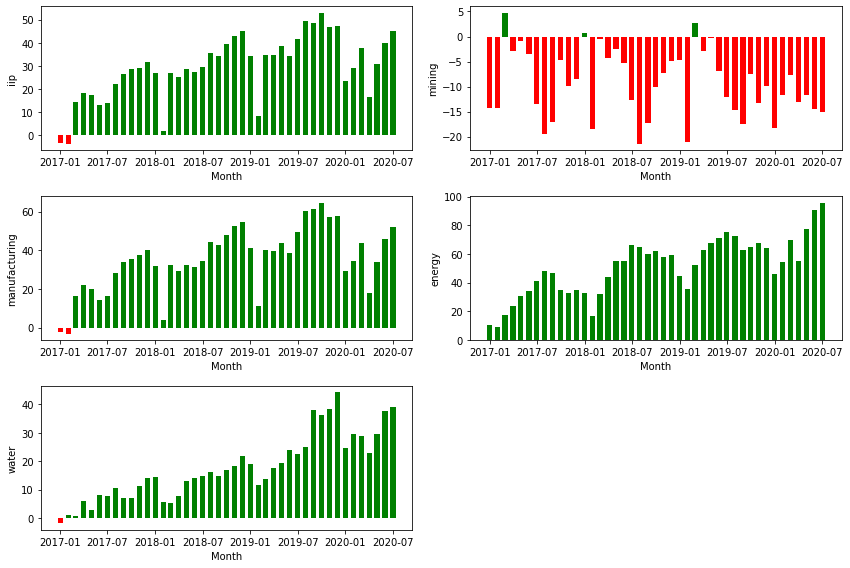

In [ ]:
def bar_color(data,color1='r',color2='g'):
    return (data>0).map({True:'g',False:'r'})

fig, axs = plt.subplots(3,2,figsize=(12,8))
for i in range(df_.shape[1]):
  r = i//2
  c = i%2
  axs[r,c].bar(x = df_.index, height=df_[df_.columns[i]],width=20,color=bar_color(df_[df_.columns[i]]))
  axs[r,c].set_xlabel('Month')
  axs[r,c].set_ylabel(df.columns[i])

fig.tight_layout()
fig.delaxes(axs[2,1])
plt.show()

Nhìn chung, với biểu đồ cột, chỉ số IIP cũng được thể hiện tương tự như line chart với 2 giai đoạn T1/2017 - T12/2019 và với từng ngành công nghiệp.

## 3.4. Trực quan dữ liệu sử dụng biểu đồ nhiệt (heatmap)

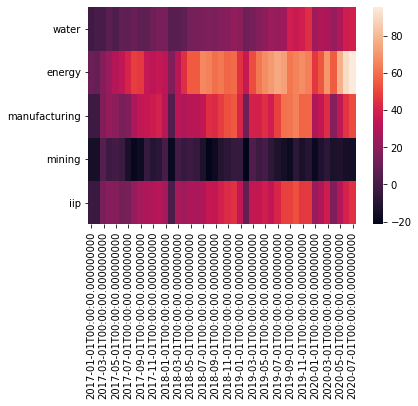

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(ax=ax,data=df_.transpose())
ax.set_xlabel('')
ax.set_ylabel('')
ax.invert_yaxis()
ax.set_title('')
plt.show()

Từ biểu đồ nhiệt trên, ta rút ra được một số kết luận sau:
* Giai đoạn 2017-đầu 2020: Với IIP chung, IIP manufacturing, IIP energy, IIP water thì mức độ tăng trưởng so với kỳ gốc 2015 ngày càng tăng. (Bằng chứng là màu của các IIP trên chuyển từ tối đến sáng). Trong khi IIP mining duy trì ở mức rất thấp và có giảm trong giai đoạn này.
* Giai đoạn 7 tháng đầu 2020: IIP water và IIP energy có vẻ như vẫn giữ được mức tăng trưởng. Các IIP còn lại giảm so với 2019.

## 3.5. Trực quan dữ liệu sử dụng biểu đồ hộp (boxplot)

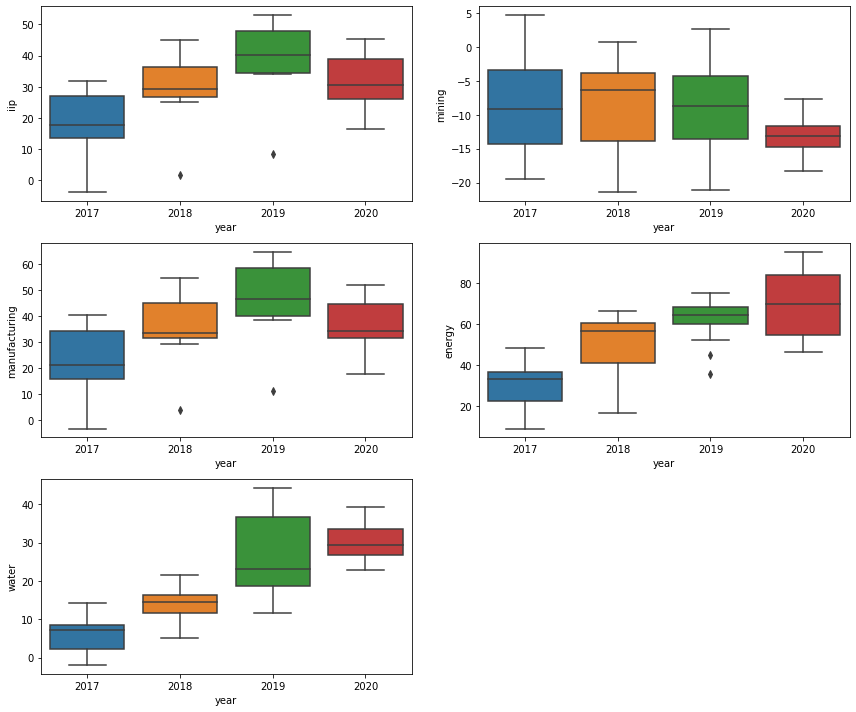

In [ ]:
df_box = df_.copy()
df_box['year']=pd.DatetimeIndex(df_box.index).year

fig, axs = plt.subplots(3,2,figsize=(12,10))
for i in range(df_box.shape[1]):
  r = i//2
  c = i%2
  sns.boxplot(x='year',y=df_box.columns[i],data=df_box,ax = axs[r,c])

fig.tight_layout()
fig.delaxes(axs[2,1])
plt.show()

Qua các boxplots trên, ta có được một số nhận xét sau:
* Trung vị, min, max, Q1, Q3 của các năm 2017 - 2019 tăng đều qua các năm. Điều này phản ánh sự tăng trưởng qua các năm của chỉ số IIP chung và IIP của các ngành công nghiệp nói riêng.
* Với IIP chung và IIP của ngành Công nghiệp chế biến, chế tạo và ngành xuất hiện 2 outliers vào các năm 2018, 2019. Với ngành Sản xuất và phân phối điện, khí đốt, nước nóng, hơi nước và điều hòa không khí xuất hiện 2 outliers vào năm 2019. Điều này phản ánh sự giảm sút tăng trưởng lớn của 1-2 tháng trong năm (giai đoạn Tết).
* Với IIP chung và của từng ngành công nghiệp trong giai đoạn 2020 (7 tháng đầu năm), boxplot giảm hầu hết so với năm 2019 ở các giá trị trung vị, min, max, Q1, Q3 (trừ boxplot energy).

## 3.6. Trực quan dữ liệu sử dụng biểu đồ xu hướng và biểu đồ chu kỳ (trend chart & seasonal chart)

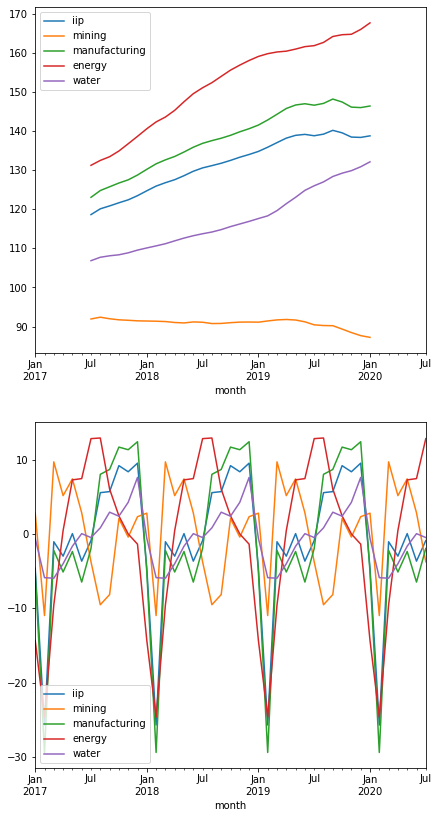

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

fig, axs = plt.subplots(2,1,figsize=(7,14))

for i in range(df.shape[1]):
  result = seasonal_decompose(df[df.columns[i]], model='additive',period=12)
  result.trend.plot(ax=axs[0])
  result.seasonal.plot(ax=axs[1])

axs[0].legend(df.columns)
axs[1].legend(df.columns)
plt.show()

__Ở biểu đồ xu hướng, ta có nhận xét sau:__
* Nhìn chunng, IIP chung và của từng ngành công nghiệp (trừ khai khoáng) có xu hướng tăng lên với mức độ tăng trưởng cao trong giai đoạn 2017-2020.
* Ở giai đoạn 7 tháng đầu năm 2020 ta có IIP chung, IIP manufacturing, IIP mining giảm. Trong khi đó, IIP energy, IIP water vẫn có xu hướng tăng.   
__Ở biểu đồ chu kỳ, ta có những nhận xét sau:__
* Ở giai đoạn 2017-đầu 2020: Đối với IIP chung và IIP từng ngành công nghiệp thì đồ thị hầu như theo một chu kỳ nhất định (cùng tăng hoặc cùng giảm ở một tháng cùng kỳ so với các tháng còn lại).
* Ở giai đoạn 7 tháng đầu năm 2020: các đồ thị của IIP chung, IIP manufacturing, IIP mining giảm rõ rệt. Trong khi IIP energy, IIP tăng so với cùng kỳ năm trước.

# 4. Áp dụng mô hình học máy

In [ ]:
!pip3 install pmdarima

In [ ]:
import pmdarima as pm

In [ ]:
def sarima_predict(data, n_train, n_predict,title):
  train = data[:n_train]
  test = data[n_train-1:]
  smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
  # Forecast
  fitted, confint = smodel.predict(n_periods=n_predict, return_conf_int=True)
  index_of_fc = pd.date_range(train.index[-1], periods = n_predict, freq='MS')

  # make series for plotting purpose
  fitted_series = pd.Series(fitted, index=index_of_fc)
  lower_series = pd.Series(confint[:, 0], index=index_of_fc)
  upper_series = pd.Series(confint[:, 1], index=index_of_fc)

  # Plot
  plt.figure(figsize=(7,7))
  plt.plot(train, label='training')
  plt.plot(test,color='green', label='actual')
  plt.plot(fitted_series, color='orange', label='predicted')
  plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
  plt.legend(loc='upper left', fontsize=8)
  plt.title(title)
  plt.show()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=157.636, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=152.742, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=155.558, Time=0.27 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=155.633, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=190.088, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=153.655, Time=0.14 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=153.655, Time=0.08 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=155.655, Time=0.14 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=154.742, Time=0.07 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=154.742, Time=0.06 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=156.742, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 1.241 seconds


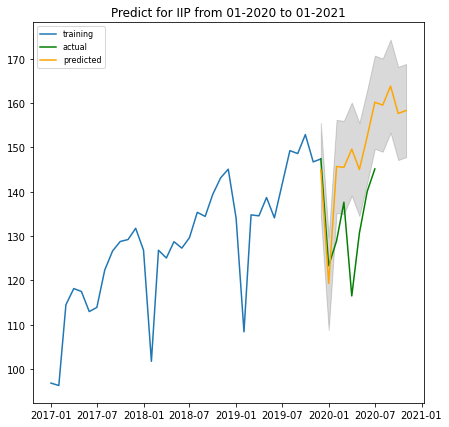

In [ ]:
sarima_predict(df['iip'],36,12,'Predict for IIP from 01-2020 to 01-2021')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=155.193, Time=0.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=154.856, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=155.932, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=153.766, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=152.454, Time=0.03 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=153.766, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=155.766, Time=0.14 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=154.276, Time=0.07 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=154.218, Time=0.05 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=154.532, Time=0.03 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=156.213, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=153.506, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 0.989 seconds


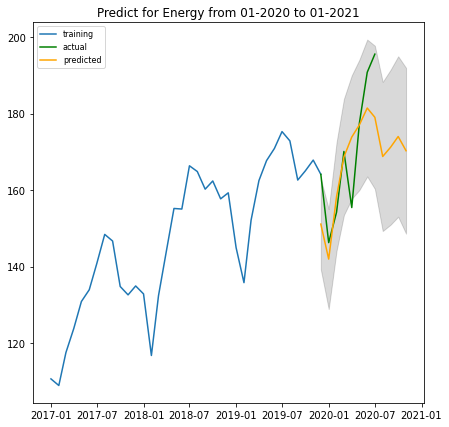

In [ ]:
sarima_predict(df['energy'],36,12,'Predict for Energy from 01-2020 to 01-2021')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=143.491, Time=0.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=139.865, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=141.666, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=141.492, Time=0.11 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=141.508, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=141.508, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=143.508, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=139.889, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=139.738, Time=0.03 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=141.492, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=143.492, Time=0.11 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=141.735, Time=0.05 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=141.735, Time=0.05 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=143.688, Time=0.12 sec
 ARIMA(0,1,1)(0,1,0)[12] intercep

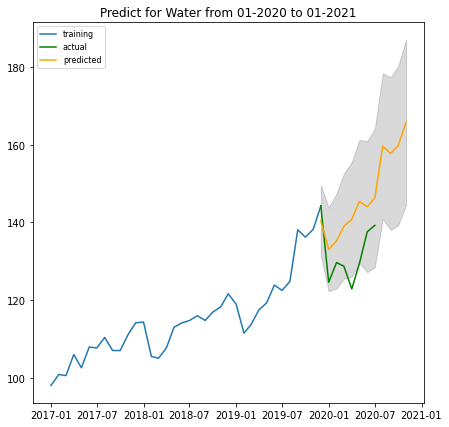

In [ ]:
sarima_predict(df['water'],36,12,'Predict for Water from 01-2020 to 01-2021')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=149.227, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=148.360, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=149.636, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=150.287, Time=0.39 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=152.287, Time=0.44 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=148.314, Time=0.06 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=150.314, Time=0.16 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=150.314, Time=0.09 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=152.314, Time=0.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=inf, Time=

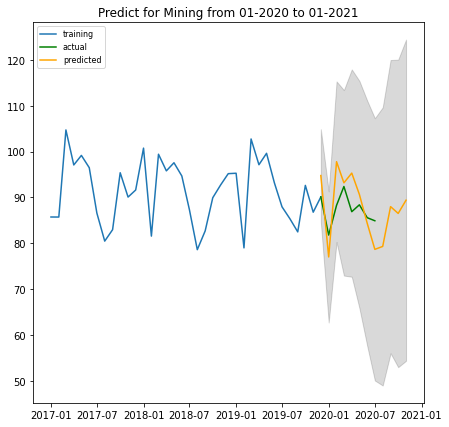

In [ ]:
sarima_predict(df['mining'],36,12,'Predict for Mining from 01-2020 to 01-2021')

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=165.890, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=160.489, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=163.906, Time=0.28 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=163.892, Time=0.15 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=197.537, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=161.910, Time=0.15 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=161.910, Time=0.08 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=163.910, Time=0.13 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=162.440, Time=0.09 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=162.443, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=164.440, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 1.547 seconds


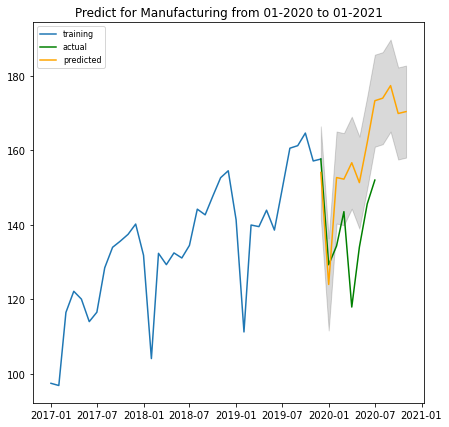

In [ ]:
sarima_predict(df['manufacturing'],36,12,'Predict for Manufacturing from 01-2020 to 01-2021')

__Nhận xét__:  
Bằng việc áp dụng mô hình học máy dự trên dữ liệu IIP có được trong giai đoạn 2017-cuối 2019, ta có thể dự đoán được đồ thị tăng trưởng IIP của giai đoạn 7 tháng đầu năm 2020. Với đường màu vàng là IIP được dự đoán và đường màu xanh lục là IIP thực tế.  
Qua những biểu đồ trên, ta có thể thấy được rằng hầu hết IIP của các ngành công nghiệp đều sụt giảm, thậm chí tăng trưởng âm so với cùng kỳ năm trước. Điều này phản ánh mức độ ảnh hưởng mà dịch Covid-19 đã tác động đến chỉ số IIP.

# 5. Kết luận

* Như vậy, có thể thấy chỉ số IIP là một chỉ số quan trọng trong phản ánh sức khỏe của nền kinh tế. Do đó, cần phải có những giải pháp phù hợp trong việc duy trì và thúc đẩy sự phát triển của các ngành kinh tế được thể hiện qua việc theo dõi, giám sát chặt chẽ những thay đổi của IIP.
* Từ những kết quả phân tích ở trên cho thấy chỉ số IIP của Việt Nam trong những năm qua đã có những chuyển biến tích cực theo hướng chuyển dịch cơ cấu ngành hướng đến phát triển kinh tế bền vững hơn trong tương lai. 
    * Trong đó, sự giảm ngành tỷ trọng của các ngành khai thác và tăng tỷ trọng của những ngành công nghiệp chế biến, chế tạo được thể hiện rõ hơn qua chỉ số IIP qua các năm.  
$\Rightarrow$ Điều này cho thấy sự điều hành kịp thời và hiệu quả nền kinh tế của của Chính phủ cũng như nỗ lực của các bộ, ngành, địa phương trong thực hiện mục tiêu tăng trưởng. Ngoài ra, sự dịch chuyển ngành sản xuất trong nền kinh tế theo hướng phát triển bền vững là tiền đề quan trọng đối với tăng trưởng kinh tế Việt Nam trong những năm qua.
* Thông qua phân tích số liệu giai đoạn 7 tháng đầu năm 2020, qua chỉ số IIP, ta cũng thấy được hậu quả rất lớn của dịch Covid-19 đối với nền kinh tế nói chung và phát triển công nghiệp nói riêng. Nếu như chính phủ cũng như các cá nhân, tổ chức không có những biện pháp phòng tránh dịch hiệu quả và để những đợt bùng phát dịch tiếp theo xảy ra thì nền công nghiệp sẽ phải gánh chịu những hậu quả rất nặng nề.

# 6. Tham khảo

- http://nsdp.gso.gov.vn/

- https://www.gso.gov.vn/default.aspx?tabid=621

- https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/